<a href="https://colab.research.google.com/github/joannameilin/Astron100-Final-Project/blob/main/Astron100_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all libraries

!pip install astropy --upgrade
!pip install photutils

import numpy as np
import math
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.7 MB/s eta 0:00:00


First let's make sure we have the relevant data. Go to the following shared Google drive:

https://drive.google.com/drive/u/1/folders/1lXT5kBVT6UnV10qUq1V4fRnoA87r0y3q

Click on **Ast100_Data -> Organize -> Add Shortcut** and mount this folder on "**MyDrive**". Then you can access via your own Google Drive account.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [36]:
#connecting Google Drive Folder w. all necessary data, creating lists

import glob
dir = 'drive/MyDrive/Astron100_Final_Project_Data'

bias_kepler_list = glob.glob(dir+"/bias_kepler/*.fits")
bias_fast_list = glob.glob(dir+"/bias_fast/*.fits")
flat_kepler_list = glob.glob(dir+"/flat_kepler/*.fits")
flat_fast_list = glob.glob(dir+"/flat_fast/*.fits")
#science_fast_dir = dir+"fast_science_images/"
#science_kepler_dir = dir+"kepler_science_images/"

science_kepler_list = glob.glob(dir+"/kepler_science_images/*.fits")
science_fast_list = glob.glob(dir+"/fast_science_images/*.fits")

print(bias_kepler_list)
print(bias_fast_list)
print(flat_kepler_list)
print(flat_fast_list)
print(science_kepler_list)
print(science_fast_list)

['drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0004.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0003.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0002.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0164.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0160.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0161.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0166.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_kepler/Copy of 0224.BIAS.fits']
['drive/MyDrive/Astron100_Final_Project_Data/bias_fast/Copy of 0009.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_fast/Copy of 0001.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_fast/Copy of 0002.BIAS.fits', 'drive/MyDrive/Astron100_Final_Project_Data/bias_fast/Copy of 0006.BIAS.fits', 'drive/MyDrive/Astron100_Final_Pro

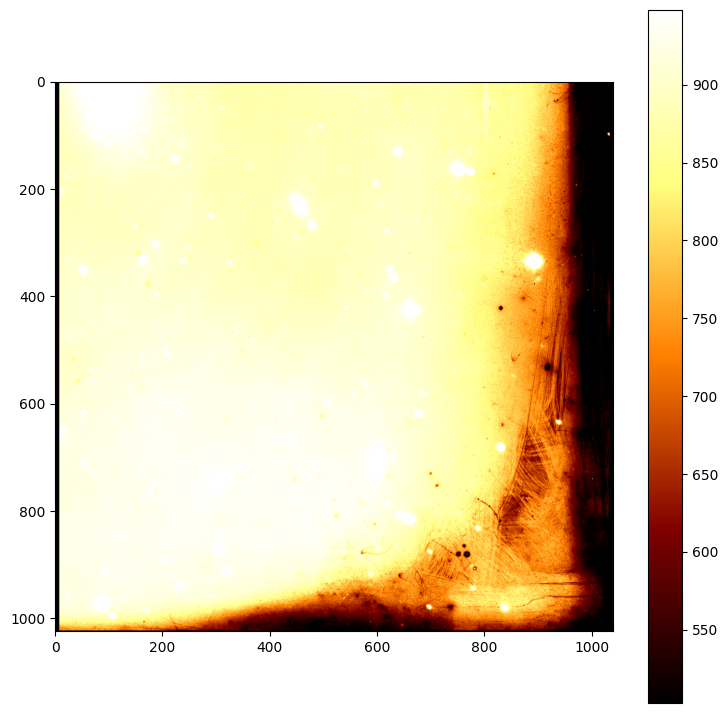

In [7]:
#Testing science image plot

data_science = fits.getdata('drive/MyDrive/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0053.A779.fits',1)

fig = plt.figure(figsize=(9,9))
plt.imshow(data_science, vmax = np.percentile(data_science, 95),
           vmin = np.percentile(data_science, 5),
           cmap = "afmhot")

plt.colorbar()
plt.show()

In [37]:

test_hdu = fits.open(flat_kepler_list[0])
test_hdu.info() #let's just print out the info about this fits file

data = test_hdu[0].data
print(data)

#test_hdu[0].header

Filename: drive/MyDrive/Astron100_Final_Project_Data/flat_kepler/0221.FLATV.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   ()      
  1  IM1           1 ImageHDU        48   (1040, 1025)   int16 (rescales to uint16)   
  2  IM2           2 ImageHDU        48   (1040, 1025)   int16 (rescales to uint16)   
  3  IM3           3 ImageHDU        48   (1040, 1025)   int16 (rescales to uint16)   
  4  IM4           4 ImageHDU        48   (1040, 1025)   int16 (rescales to uint16)   
None


## Master Lists for KeplerCam Data (Bias & Flats)

In [42]:
#creating master lists for Kepler bias data
#KB: Kepler Bias
KBdata_array_full_1 = []
KBdata_array_full_2 = []
KBdata_array_full_3 = []
KBdata_array_full_4 = []

for i,fn in enumerate(bias_kepler_list[:20]):
  KBdata1 = fits.getdata(fn, 1)
  KBdata_array_full_1.append(KBdata1[None]) #None gives a dummy axis, wants to concatenate along the dummy axis

  KBdata2 = fits.getdata(fn, 2)
  KBdata_array_full_2.append(KBdata2[None])

  KBdata3 = fits.getdata(fn, 3)
  KBdata_array_full_3.append(KBdata3[None])

  KBdata4 = fits.getdata(fn, 4)
  KBdata_array_full_4.append(KBdata4[None])

KBdata_array_full_1 = np.concatenate(KBdata_array_full_1, axis = 0)
KBmaster_bias_1 = np.median(KBdata_array_full_1, axis = 0)

KBdata_array_full_2 = np.concatenate(KBdata_array_full_2, axis = 0)
KBmaster_bias_2 = np.median(KBdata_array_full_2, axis = 0)

KBdata_array_full_3 = np.concatenate(KBdata_array_full_3, axis = 0)
KBmaster_bias_3 = np.median(KBdata_array_full_3, axis = 0)

KBdata_array_full_4 = np.concatenate(KBdata_array_full_4, axis = 0)
KBmaster_bias_4 = np.median(KBdata_array_full_4, axis = 0)

#print shapes of the mas
print(KBmaster_bias_1.shape)
print(KBmaster_bias_2.shape)
print(KBmaster_bias_3.shape)
print(KBmaster_bias_4.shape)

(1025, 1040)
(1025, 1040)
(1025, 1040)
(1025, 1040)


In [43]:
#creating master lists for Kepler flats data, r band
#KFR: Kepler flats r band
#Notes for later - need to build master lists like this for all other filters
KFRdata_array_full_1f = []
KFRdata_array_full_2f = []
KFRdata_array_full_3f = []
KFRdata_array_full_4f = []

for i,fn in enumerate(flat_kepler_list[:20]):
    if fits.getheader(fn)['FILTER'] != 'r':
      continue
    KFRdata1f = fits.getdata(fn, 1)
    KFRdata_array_full_1f.append(KFRdata1f[None]) #None gives a dummy axis, wants to concatenate along the dummy axis

    KFRdata2f = fits.getdata(fn, 2)
    KFRdata_array_full_2f.append(KFRdata2f[None])

    KFRdata3f = fits.getdata(fn, 3)
    KFRdata_array_full_3f.append(KFRdata3f[None])

    KFRdata4f = fits.getdata(fn, 4)
    KFRdata_array_full_4f.append(KFRdata4f[None])

KFRdata_array_full_1f = np.concatenate(KFRdata_array_full_1f, axis = 0)
KFRmaster_flats_1 = np.median(KFRdata_array_full_1f, axis = 0)

KFRdata_array_full_2f = np.concatenate(KFRdata_array_full_2f, axis = 0)
KFRmaster_flats_2 = np.median(KFRdata_array_full_2f, axis = 0)

KFRdata_array_full_3f = np.concatenate(KFRdata_array_full_3f, axis = 0)
KFRmaster_flats_3 = np.median(KFRdata_array_full_3f, axis = 0)

KFRdata_array_full_4f = np.concatenate(KFRdata_array_full_4f, axis = 0)
KFRmaster_flats_4 = np.median(KFRdata_array_full_4f, axis = 0)

#print shapes of the master biases
print(KFRmaster_flats_1.shape)
print(KFRmaster_flats_2.shape)
print(KFRmaster_flats_3.shape)
print(KFRmaster_flats_4.shape)

(1025, 1040)
(1025, 1040)
(1025, 1040)
(1025, 1040)


In [ ]:
#creating master lists for flats data, specifically in the v band
#lines below need to be edited
KFRdata_array_full_1f = []
KFRdata_array_full_2f = []
KFRdata_array_full_3f = []
KFRdata_array_full_4f = []

for i,fn in enumerate(flat_list[:20]):
    if fits.getheader(fn)['FILTER'] != 'BH':
      continue
    KFRdata1f = fits.getdata(fn, 1)
    KFRdata_array_full_1f.append(KFRdata1f[None]) #None gives a dummy axis, wants to concatenate along the dummy axis

    KFRdata2f = fits.getdata(fn, 2)
    KFRdata_array_full_2f.append(KFRdata2f[None])

    KFRdata3f = fits.getdata(fn, 3)
    KFRdata_array_full_3f.append(KFRdata3f[None])

    KFRdata4f = fits.getdata(fn, 4)
    KFRdata_array_full_4f.append(KFRdata4f[None])

KFRdata_array_full_1f = np.concatenate(KFRdata_array_full_1f, axis = 0)
KFRmaster_flats_1 = np.median(KFRdata_array_full_1f, axis = 0)

KFRdata_array_full_2f = np.concatenate(KFRdata_array_full_2f, axis = 0)
KFRmaster_flats_2 = np.median(KFRdata_array_full_2f, axis = 0)

KFRdata_array_full_3f = np.concatenate(KFRdata_array_full_3f, axis = 0)
KFRmaster_flats_3 = np.median(KFRdata_array_full_3f, axis = 0)

KFRdata_array_full_4f = np.concatenate(KFRdata_array_full_4f, axis = 0)
KFRmaster_flats_4 = np.median(KFRdata_array_full_4f, axis = 0)

#print shapes of the master biases
print(KFRmaster_flats_1.shape)
print(KFRmaster_flats_2.shape)
print(KFRmaster_flats_3.shape)
print(KFRmaster_flats_4.shape)

KeyboardInterrupt: 

## Master Lists for FAST Data (Bias & Flats)

In [44]:
#creating master lists for FAST bias data
fastdata_array_full_1 = []
fastdata_array_full_2 = []
fastdata_array_full_3 = []
fastdata_array_full_4 = []

for i,fn in enumerate(bias_kepler_list[:20]):
  fastdata1 = fits.getdata(fn, 1)
  fastdata_array_full_1.append(fastdata1[None]) #None gives a dummy axis, wants to concatenate along the dummy axis

  fastdata2 = fits.getdata(fn, 2)
  fastdata_array_full_2.append(fastdata2[None])

  fastdata3 = fits.getdata(fn, 3)
  fastdata_array_full_3.append(fastdata3[None])

  fastdata4 = fits.getdata(fn, 4)
  fastdata_array_full_4.append(fastdata4[None])

fastdata_array_full_1 = np.concatenate(fastdata_array_full_1, axis = 0)
fastmaster_bias_1 = np.median(fastdata_array_full_1, axis = 0)

fastdata_array_full_2 = np.concatenate(fastdata_array_full_2, axis = 0)
fastmaster_bias_2 = np.median(fastdata_array_full_2, axis = 0)

fastdata_array_full_3 = np.concatenate(fastdata_array_full_3, axis = 0)
fastmaster_bias_3 = np.median(fastdata_array_full_3, axis = 0)

fastdata_array_full_4 = np.concatenate(fastdata_array_full_4, axis = 0)
fastmaster_bias_4 = np.median(fastdata_array_full_4, axis = 0)

#print shapes of the mas
print(fastmaster_bias_2.shape)
print(fastmaster_bias_3.shape)
print(fastmaster_bias_4.shape)

(1025, 1040)
(1025, 1040)
(1025, 1040)


## Visualization Function Code

['drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0059.A779.fits', 'drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0057.A779.fits', 'drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0054.A779.fits', 'drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0055.A779.fits', 'drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0058.A779.fits', 'drive/MyDrive/Astron100_Final_Project_Data/kepler_science_images/Copy of 0053.A779.fits']
(1040,)


TypeError: Invalid shape (1040,) for image data

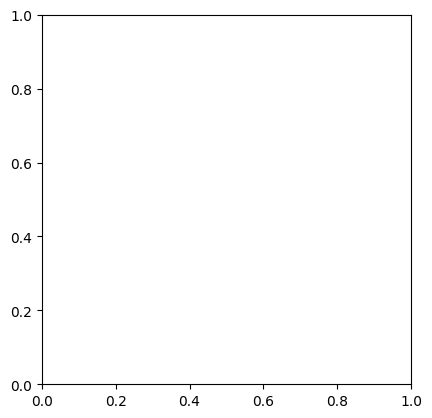

In [83]:
#coding a visualization function
def mosaic(science_kepler_list):
  #science_kepler_list = glob.glob(dir+"/kepler_science_images/*.fits")

  #opening the fits files
  images = []
  for file in science_kepler_list:
    hdu = fits.getdata(file)
    images.append(hdu[0].data)
  print(images[0].shape)

  #defining dimensions of output
  #height, width = images[0].shape

  #making an empty shell
  #mosaic = np.zeros((height*2, width*2), dtype = hdu[0].data)

  plt.imshow(images[0])

  return mosaic

im = glob.glob(dir+"/kepler_science_images/*.fits")
print(im)
mosaic(im)
plt.imshow(mosaic)

plt.axis('off')
plt.show()



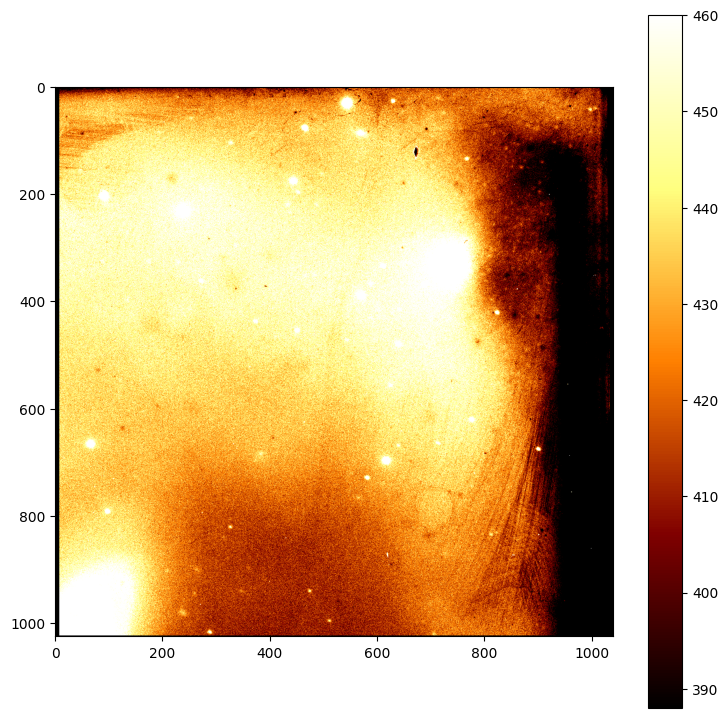

In [ ]:
data_science = fits.getdata(science_list[1], 3)
fig = plt.figure(figsize=(9,9))
plt.imshow(data_science, vmax = np.percentile(data_science, 95),
           vmin = np.percentile(data_science, 10),
           cmap = "afmhot")

plt.colorbar()
plt.show()

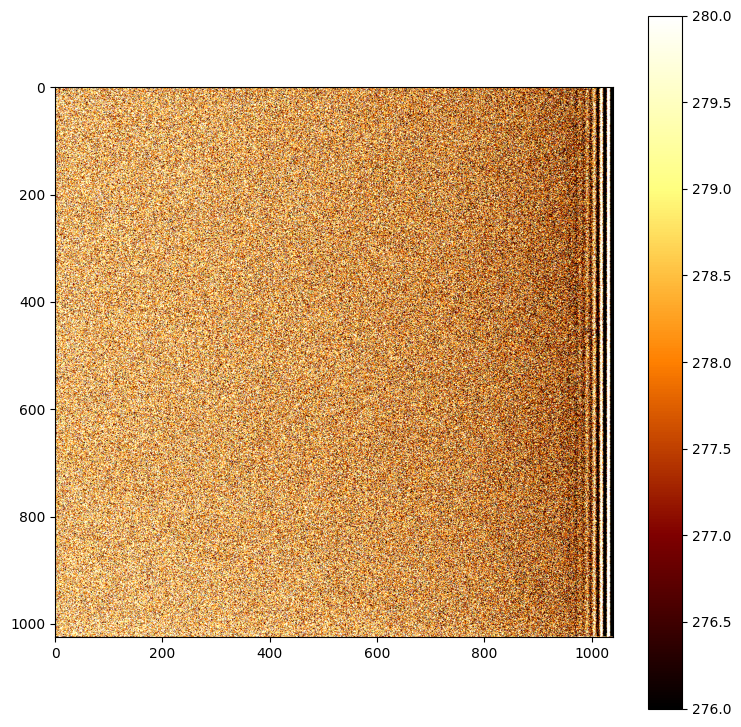

In [ ]:
data_bias = fits.getdata(bias_list[0])
fig = plt.figure(figsize=(9,9))
plt.imshow(data_bias, vmax = np.percentile(data_bias, 90),
           vmin = np.percentile(data_bias, 10),
           cmap = "afmhot")

plt.colorbar()
plt.show()

**Create a median bias image.** Read in all the bias images and take a median along the different frames. This will produce a "master bias" that will be used to correct both the science image and the flat frames. Median is less sensitive to outliers than means or sums.

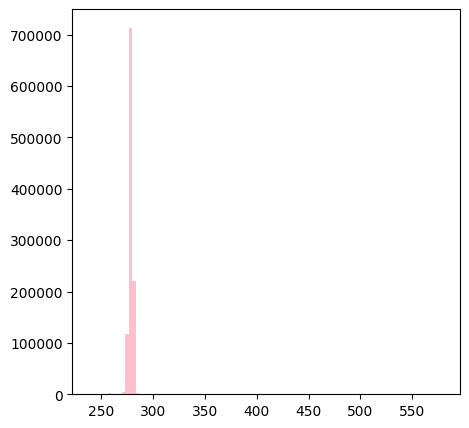

In [ ]:
#bias histogram
fig = plt.figure(figsize=(5,5))
plt.hist(data_bias.flatten(), bins = 100, color = 'pink')
plt.show()

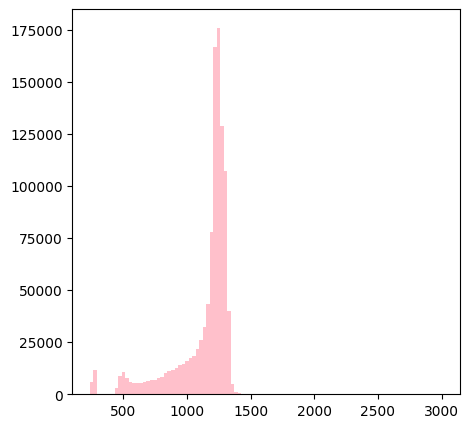

In [ ]:
#flats histogram
fig = plt.figure(figsize=(5,5))
plt.hist(data_flat.flatten(), bins = 100, color = 'pink')
plt.show()

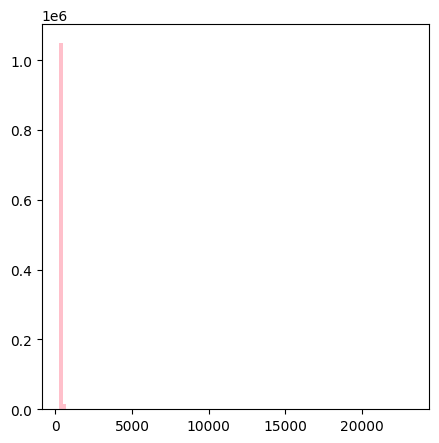

In [ ]:
#science image histogram
fig = plt.figure(figsize=(5,5))
plt.hist(data_science.flatten(), bins = 100, color = 'pink')
plt.show()

**Create a median flat field image**. Read in all flats images, subtract the master bias, and create a median flat image. Don't forget that flats must be the same "band" as the science image you are correcting. Why?

**Recall the order in which you should correct the science data. Try recovering the full image!**

You can think of the $i^{th}$ pixel as performing a simple linear operation on incoming light:

$q_i \approx A_i\times I_i + B_i$

Where $q_i$ is the signal we measure and $I_i$ is the true intensity of the sky at that pixel's position. $A_i$ is related to our flat frames. $B_i$ is the offset which comes from bias frames and dark current. Thus,

$\bf I \approx \frac{Q - B}{A}$

where $\bf I$ is our "reduced" sky image (a reconstruction of the true sky we wish to measure).

$\bf Q$ is the raw science image.

$\bf B$ is the bias image (ignore dark current for this exercise).

$\bf A = Flat - B$ is the bias-corrected Flat image. We must remove the bias because the CCD had the same bias when we took the flat exposures!

In [ ]:
#choosing master lists together for flats and bias
master_r_flat = KFRmaster_flats_3
master_bias = master_bias_3

#bias-corrected flat image
A = master_r_flat  - master_bias


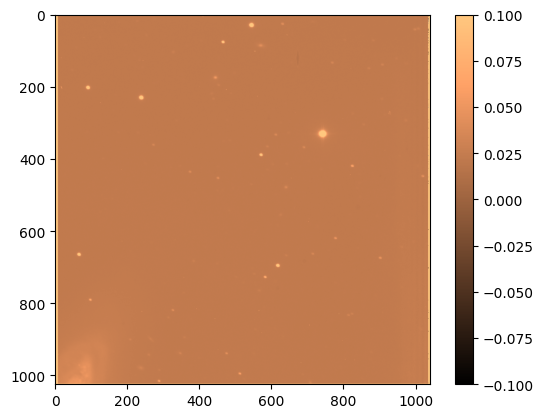

In [ ]:
#science image in the red band
Q = fits.getdata(science_fast_list[3], 3)
I = (Q - master_bias)/A

plt.imshow(I, vmax = np.percentile(I, 95),
           vmin = np.percentile(I, 10),
           cmap = "copper")

plt.colorbar()
plt.show()

In [ ]:
#choosing master flats and bias for filter B
master_BH_flat = KFRmaster_flats_3
master_bias = master_bias_3

## Spectrograph Stuff

In [ ]:
import glob

#getting bias data
fl1 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*BIAS*fits')
for fn_bias in fl1:
  print(fn_bias)

#getting flats data
fl2 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*FLAT*fits')
for fn_flats in fl2:
  print(fn_flats)

drive/MyDrive/Ast100_Data/spectra/0011.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0017.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0008.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0016.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0014.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0002.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0005.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0007.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0015.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0009.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0010.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0018.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0003.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0001.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0004.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0013.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0012.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0006.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0020.BIAS.fits
drive/MyDrive/Ast100_Data/spectra/0019.BIAS.fits


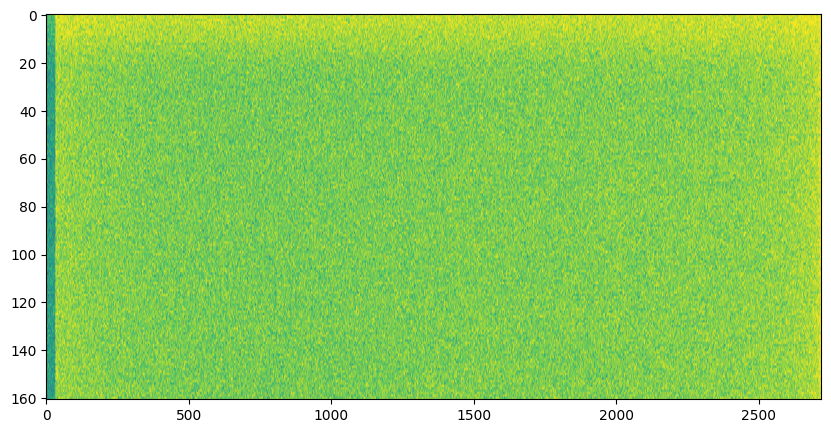

In [ ]:
#plotting bias data
fl1 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*BIAS*fits')
data_bias = fits.getdata(fl1[0])
fig = plt.figure(figsize=(10,5))
plt.imshow(data_bias, aspect='auto', vmax=np.percentile(data_bias, 90))

#making bias master list
master_bias = []

for fn in fl:
  data_bias = fits.getdata(fn)
  master_bias.append(data_bias[None])

master_bias = np.concatenate(master_bias, axis = 0)
master_bias_median = np.median(master_bias, axis = 0) #master median bias list


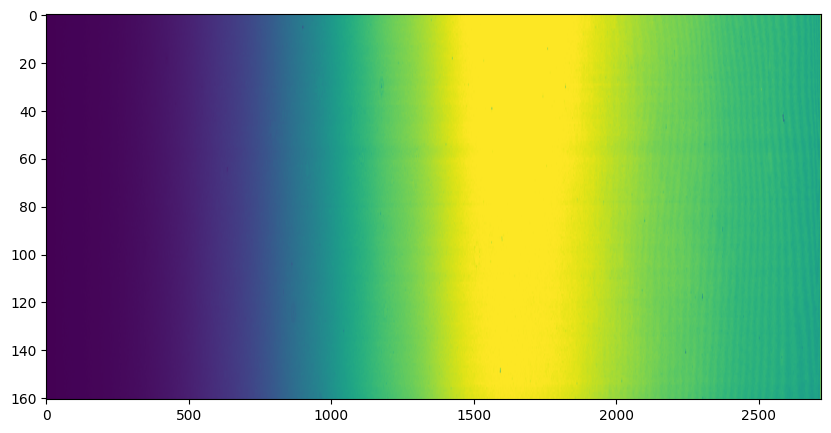

In [ ]:
#plotting flat data
fl2 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*FLAT*fits')
data_flat = fits.getdata(fl2[0])
fig = plt.figure(figsize=(10,5))
plt.imshow(data_flat, aspect='auto', vmax = np.percentile(data_flat, 90))

#making flat master list and median
master_flats = []

for fn in fl:
  data_flat = fits.getdata(fn)
  master_flats.append(data_bias[None])

master_flats = np.concatenate(master_flats, axis = 0)
master_flats_median = np.median(master_flats, axis = 0) #master median bias list

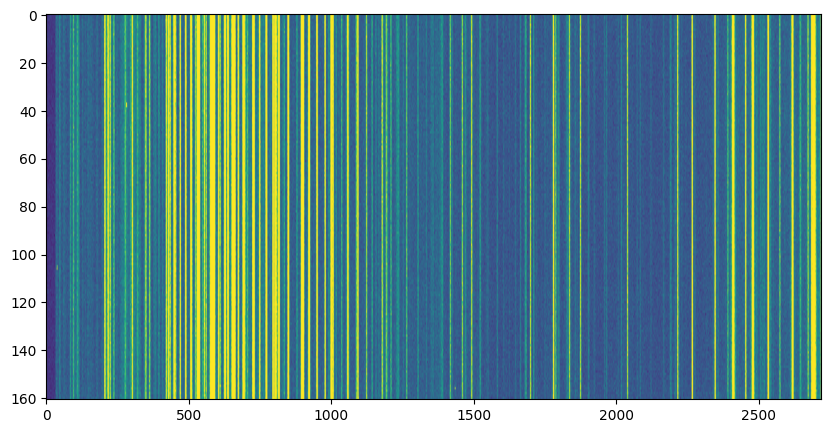

In [ ]:
#plotting comp data
fl2 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*COMP*fits')
data_comp = fits.getdata(fl2[0])
fig = plt.figure(figsize=(10,5))
plt.imshow(data_comp, aspect='auto', vmax = np.percentile(data_comp, 90))

<Figure size 1000x500 with 0 Axes>

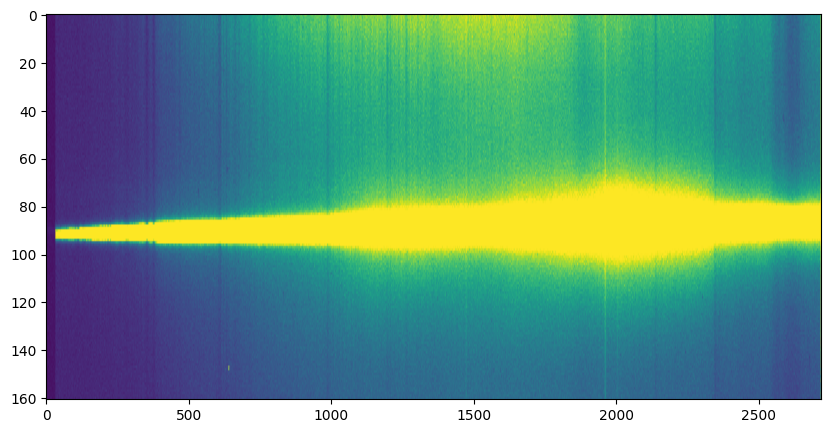

In [ ]:
#plotting science data
fl3 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*ganyemede*fits')
data_science = fits.getdata(fl3[0])
fig = plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
plt.imshow(data_science, aspect='auto', vmax = np.percentile(data_science, 90))


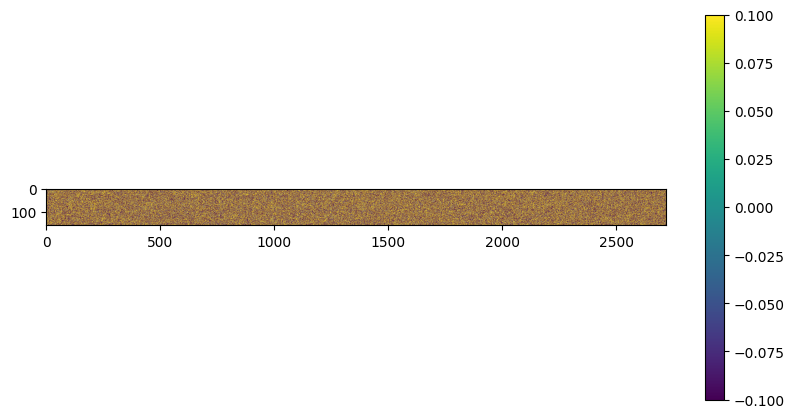

In [ ]:
#removing biases
fl3 = glob.glob('drive/MyDrive/Ast100_Data/spectra/*ganyemede*fits')
A1 = master_flats_median - master_bias_median
Q1 = fits.getdata(fl3[0])
I1 = (Q1 - master_bias_median)/A1

plt.figure(figsize=(10,5))
plt.imshow(I1, vmax = np.percentile(I1, 95))

plt.colorbar()
plt.show()